<a href="https://colab.research.google.com/github/juhyeonjeong/2025_mirae_master/blob/main/%EC%A3%BC%ED%98%84%EC%A0%95_2%E1%84%8B%E1%85%B5%E1%86%AF%E1%84%8E%E1%85%A1_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8_%E1%84%90%E1%85%A1%E1%86%B7%E1%84%89%E1%85%A2%E1%86%A8%E1%84%8C%E1%85%A5%E1%86%A8%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2일차 탐색적 데이터 분석

## 1.Gemini로 데이터 분석하기
- 주제: **청소년 고민상담 대상 데이터 분석**
- 데이터 출처: https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Flist_id%3DA0403%26obj_var_id%3D%26seqNo%3D%26eType%3D%26tblId%3DDT_1SSFA150R%26vw_cd%3DMT_TM1_TITLE%26orgId%3D101%26path%3D%252FeasyViewStatis%252FcustomStatisIndex.do%26conn_path%3DMT_TM1_TITLE%26itm_id%3D%26lang_mode%3Dko%26scrId%3D%26
- 데이터 사용: **2024-11-12**


### 1-1.Prompt

#### 전체 청소년의 고민 상담 대상 비율 (파이 차트)
- 13~24세 전체 청소년이 고민이 있을 때 가장 많이 상담하는 대상이 누구인지 각 대상별 비율

#### 성별에 따른 고민 상담 대상 비율 비교 (막대 그래프)
- 남/여 청소년이 고민이 있을 때 각각 누구와 상담하는지 비교하여 성별에 따른 차이 확인

#### 학력별 고민 상담 대상 비율 비교 (누적 막대 그래프)
- 중학생, 고등학생, 대학생/대학원생/졸업자 등 학력 수준별로 고민 상담 대상에 어떤 차이가 있는지 비교

In [1]:
!fc-list | grep Nanum

/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Bold,나눔스퀘어라운드 Bold:style=Bold,Regular
/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf: NanumGothicCoding,나눔고딕코딩:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf: NanumSquareRound,나눔스퀘어라운드,NanumSquareRound Regular,나눔스퀘어라운드 Regular:style=Regular
/usr/share/fonts/truetype/nanum/NanumSquareB.ttf: NanumSquare,나눔스퀘어,NanumSquare Bold,나눔스퀘어 Bold:style=Bold
/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf: NanumBarunGothic,나눔바른고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothic.ttf: NanumGothic,나눔고딕:style=Regular
/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf: NanumGothicCoding,나눔고딕코딩:style=Regular
/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf: NanumBarunGothic,나눔바른고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf: NanumGothic,나눔고딕:style=Bold
/usr/share/fonts/truetype/nanum/NanumSquareR.ttf: NanumSquare,나눔스퀘어:style=Regular
/us

In [2]:
# 1. 캐시 제거 (강제 초기화)
import matplotlib as mpl
import os

cache_dir = mpl.get_cachedir()
print(f'캐시 위치: {cache_dir}')

# 폰트 캐시 삭제
for f in os.listdir(cache_dir):
    if 'fontlist' in f:
        os.remove(os.path.join(cache_dir, f))

캐시 위치: /root/.cache/matplotlib


In [3]:
# 1. 한글 폰트 설치 (Colab은 Linux 기반이기 때문에 필요)
!apt-get -qq install -y fonts-nanum

# 2. matplotlib에 한글 폰트 적용 (경로 직접 지정)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = fontprop.get_name()
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 설치된 나눔 폰트 확인
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]

['NanumMyeongjo',
 'NanumGothic',
 'NanumMyeongjo',
 'NanumBarunGothic',
 'NanumGothicCoding',
 'NanumSquareRound',
 'NanumGothicCoding',
 'NanumBarunGothic',
 'NanumSquare',
 'NanumSquare',
 'NanumGothic',
 'NanumSquareRound']

In [5]:
# 파일 업로드 및 읽기
import pandas as pd

file_path = "/content/sample_data/youth1.csv"
df = pd.read_csv(file_path, index_col=False)

df.head()  # 앞에서 5개 데이터 보여줘.

,행정구역별(1),특성별(1),특성별(2),2024,2024.1,2024.2,2024.3,2024.4,2024.5,2024.6,2024.7,2024.8,2024.9,2024.10
0,행정구역별(1),특성별(1),특성별(2),계,아버지,어머니,형제·자매,친구 동료,선·후배,스승,전문상담가,인터넷(누리소통망(SNS) 등),기타,스스로 해결
1,전국,전체,계,100.0,4.6,29.6,4.3,40.7,1.1,1.3,0.4,0.7,0.3,17.1
2,전국,동·읍면부,동부,100.0,4.7,29.9,4.0,40.8,0.9,1.3,0.4,0.6,0.2,17.2
3,전국,동·읍면부,읍면부,100.0,3.7,27.8,6.5,39.9,2.0,1.7,0.3,1.0,0.4,16.6
4,전국,성별,남자,100.0,6.1,27.6,3.0,40.4,1.4,1.9,0.3,0.7,0.3,18.2




---



## 2.Gemini로 데이터 분석하기

1. 데이터 로드 및 전처리 후 컬럼 정리

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import io
import numpy as np # numpy import

# 1. 데이터 로드 및 전처리
df = """행정구역별(1),특성별(1),특성별(2),2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024
"행정구역별(1)","특성별(1)",특성별(2),계,아버지,어머니,형제·자매,친구 동료,선·후배,스승,전문상담가,인터넷(누리소통망(SNS) 등),기타,스스로 해결
"전국","전체",계,100.0,4.6,29.6,4.3,40.7,1.1,1.3,0.4,0.7,0.3,17.1
"전국","동·읍면부",동부,100.0,4.7,29.9,4.0,40.8,0.9,1.3,0.4,0.6,0.2,17.2
"전국","동·읍면부",읍면부,100.0,3.7,27.8,6.5,39.9,2.0,1.7,0.3,1.0,0.4,16.6
"전국","성별",남자,100.0,6.1,27.6,3.0,40.4,1.4,1.9,0.3,0.7,0.4,18.2
"전국","성별",여자,100.0,3.0,31.7,5.7,40.9,0.8,0.7,0.5,0.7,0.2,15.8
"전국","학력별",중학생,100.0,4.8,28.7,4.3,43.3,1.2,1.3,0.4,0.6,0.3,15.1
"전국","학력별",고등학생,100.0,4.7,29.6,4.6,41.2,1.2,1.3,0.3,0.7,0.3,16.0
"전국","학력별","대학생(대학원생 포함)",100.0,4.1,29.7,3.9,37.3,0.9,1.3,0.5,0.7,0.2,21.5
"전국","학력별","학교 밖 청소년(졸업자)",100.0,4.4,31.0,4.3,41.2,0.8,1.2,0.6,0.8,0.3,15.3
"""

df = pd.read_csv(io.StringIO(df), header=1)

# 컬럼명 정리
df.columns = ['행정구역별(1)', '특성별(1)', '특성별(2)', '계', '아버지', '어머니', '형제·자매', '친구 동료', '선·후배', '스승', '전문상담가', '인터넷(누리소통망(SNS) 등)', '기타', '스스로 해결']

# **중요: 특성별(1) 컬럼의 공백 제거 (strip() 사용)**
df['특성별(1)'] = df['특성별(1)'].str.strip()
df['특성별(2)'] = df['특성별(2)'].str.strip()


# 분석에 필요한 행 필터링
df_all = df[(df['특성별(1)'] == '전체') & (df['특성별(2)'] == '계')]
df_gender = df[df['특성별(1)'] == '성별']
df_edu = df[df['특성별(1)'] == '학력별']

# 숫자형으로 변환할 컬럼 리스트
consult_cols = ['아버지', '어머니', '형제·자매', '친구 동료', '선·후배', '스승', '전문상담가', '인터넷(누리소통망(SNS) 등)', '기타', '스스로 해결']

# 데이터 타입 변환: errors='coerce'로 변환 불가능한 값은 NaN으로, fillna(0)로 NaN을 0으로 채움
for col in consult_cols:
    df_all[col] = pd.to_numeric(df_all[col], errors='coerce').fillna(0)
    df_gender[col] = pd.to_numeric(df_gender[col], errors='coerce').fillna(0)
    df_edu[col] = pd.to_numeric(df_edu[col], errors='coerce').fillna(0)



/tmp/ipython-input-12-1444237612.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all[col] = pd.to_numeric(df_all[col], errors='coerce').fillna(0)
/tmp/ipython-input-12-1444237612.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gender[col] = pd.to_numeric(df_gender[col], errors='coerce').fillna(0)
/tmp/ipython-input-12-1444237612.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

2. 한글 폰트 설정

In [7]:
# 2. 한글 폰트 설정 (Colab 환경에 최적화)
# 나눔 폰트 설치 및 캐시 재빌드
# 이 부분은 Colab 세션당 한 번만 실행하면 되지만, 매번 실행해도 무방합니다.
!sudo apt-get update -qq && apt-get install -y fonts-nanum > /dev/null
!sudo fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib # Matplotlib 폰트 캐시 삭제

# 폰트 설정 적용
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

print("### 2024년 13~24세 청소년 고민 상담 대상 분석 ###\n")



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
### 2024년 13~24세 청소년 고민 상담 대상 분석 ###



3. 차트 1: 전체 청소년의 고민 상담 대상 비율 (파이 차트)

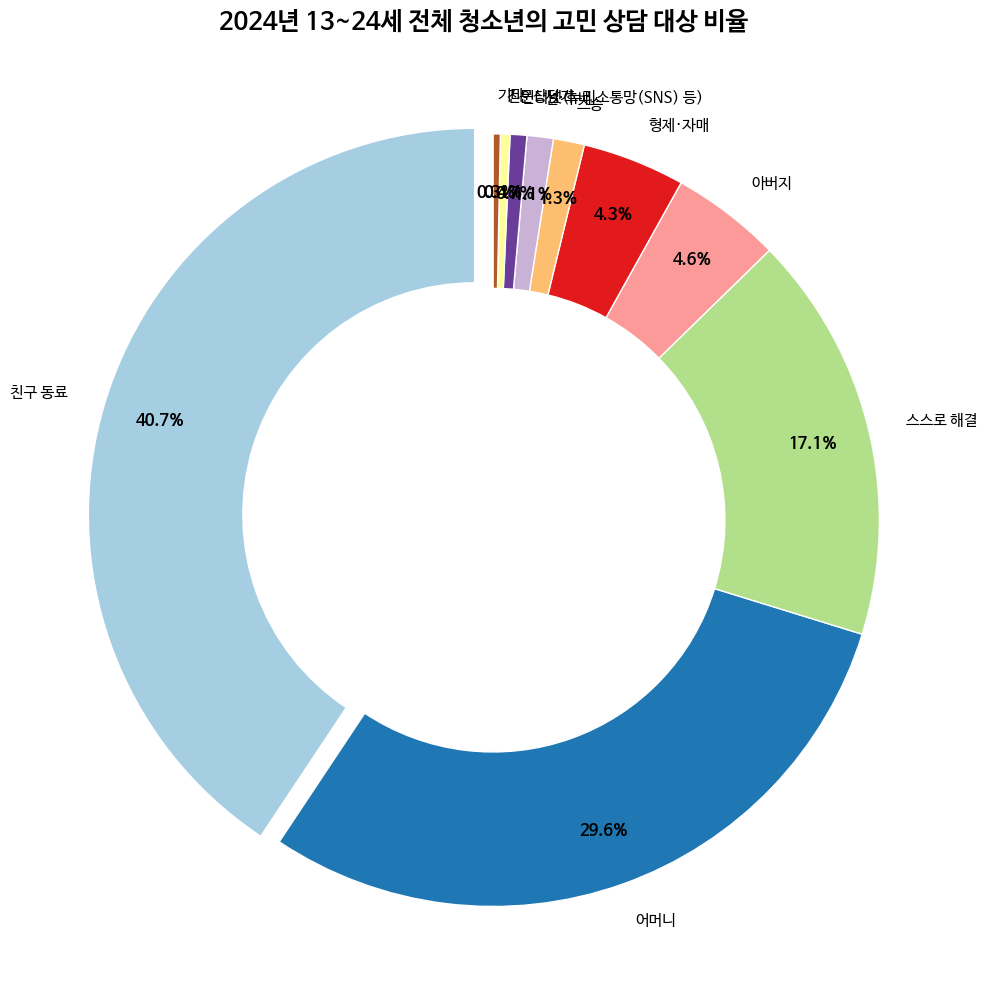


--- 차트 1 분석: 전체 청소년의 고민 상담 대상 ---
가장 높은 비율을 차지하는 상담 대상: **친구 동료 (40.7%)**
대부분의 청소년은 '친구 동료'와 고민을 상담하며, 다음으로 '어머니', 그리고 '스스로 해결'하는 비중도 높게 나타납니다.


In [13]:


# --- 차트 1: 전체 청소년의 고민 상담 대상 비율 (파이 차트 - 개선 버전) ---
if not df_all.empty:
    data_pie_series = df_all.iloc[0][consult_cols]

    # 비율이 0인 항목은 제외하여 차트가 깔끔하게 보이도록 합니다.
    filtered_data_pie = data_pie_series[data_pie_series > 0]

    # 비율이 높은 순서대로 정렬
    filtered_data_pie = filtered_data_pie.sort_values(ascending=False)

    labels = filtered_data_pie.index
    sizes = filtered_data_pie.values

    # 상위 3개 정도만 강조하고 나머지는 'etc'로 묶기 (선택 사항)
    # 현재는 모든 항목을 표시하되, 가장 큰 항목만 강조합니다.

    # '친구 동료'를 강조하기 위한 explode 설정
    explode = [0.05 if label == '친구 동료' else 0 for label in labels]
    # 또는 가장 큰 비율을 가진 항목만 강조
    # explode = [0.05 if i == 0 else 0 for i in range(len(sizes))]

    # 색상 팔레트 선택 (Accent, Pastel1, Set3 등 다양하게 시도 가능)
    # plt.cm.Set3, plt.cm.Pastel1, plt.cm.tab20
    colors = plt.cm.Paired(np.linspace(0, 1, len(labels))) # Paired 팔레트 사용

    plt.figure(figsize=(10, 10))

    # 도넛 차트 만들기 (wedgeprops 사용)
    wedges, texts, autotexts = plt.pie(
        sizes,
        explode=explode,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',       # 백분율 포맷
        pctdistance=0.85,        # 백분율 텍스트 위치 (도넛 차트의 바깥쪽으로)
        startangle=90,           # 시작 각도
        wedgeprops=dict(width=0.4, edgecolor='w') # 도넛 두께와 흰색 테두리
    )

    # 백분율 텍스트 스타일링 (진하게, 크게)
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
        autotext.set_weight('bold')

    # 라벨 텍스트 스타일링 (선택 사항)
    for text in texts:
        text.set_fontsize(11)

    plt.title('2024년 13~24세 전체 청소년의 고민 상담 대상 비율', fontsize=18, fontweight='bold', pad=20)
    plt.axis('equal') # 원형 유지
    plt.tight_layout() # 여백 자동 조절
    plt.show()

    most_frequent_consultant_all = filtered_data_pie.idxmax()
    most_frequent_percentage_all = filtered_data_pie.max()

    print(f"\n--- 차트 1 분석: 전체 청소년의 고민 상담 대상 ---")
    print(f"가장 높은 비율을 차지하는 상담 대상: **{most_frequent_consultant_all} ({most_frequent_percentage_all:.1f}%)**")
    print("대부분의 청소년은 '친구 동료'와 고민을 상담하며, 다음으로 '어머니', 그리고 '스스로 해결'하는 비중도 높게 나타납니다.")

else:
    print("\n--- 차트 1 (전체 청소년): 분석할 데이터가 없거나 필터링에 실패했습니다. ---")

4. 차트 2: 성별에 따른 고민 상담 대상 비율 비교 (그룹 막대 그래프)

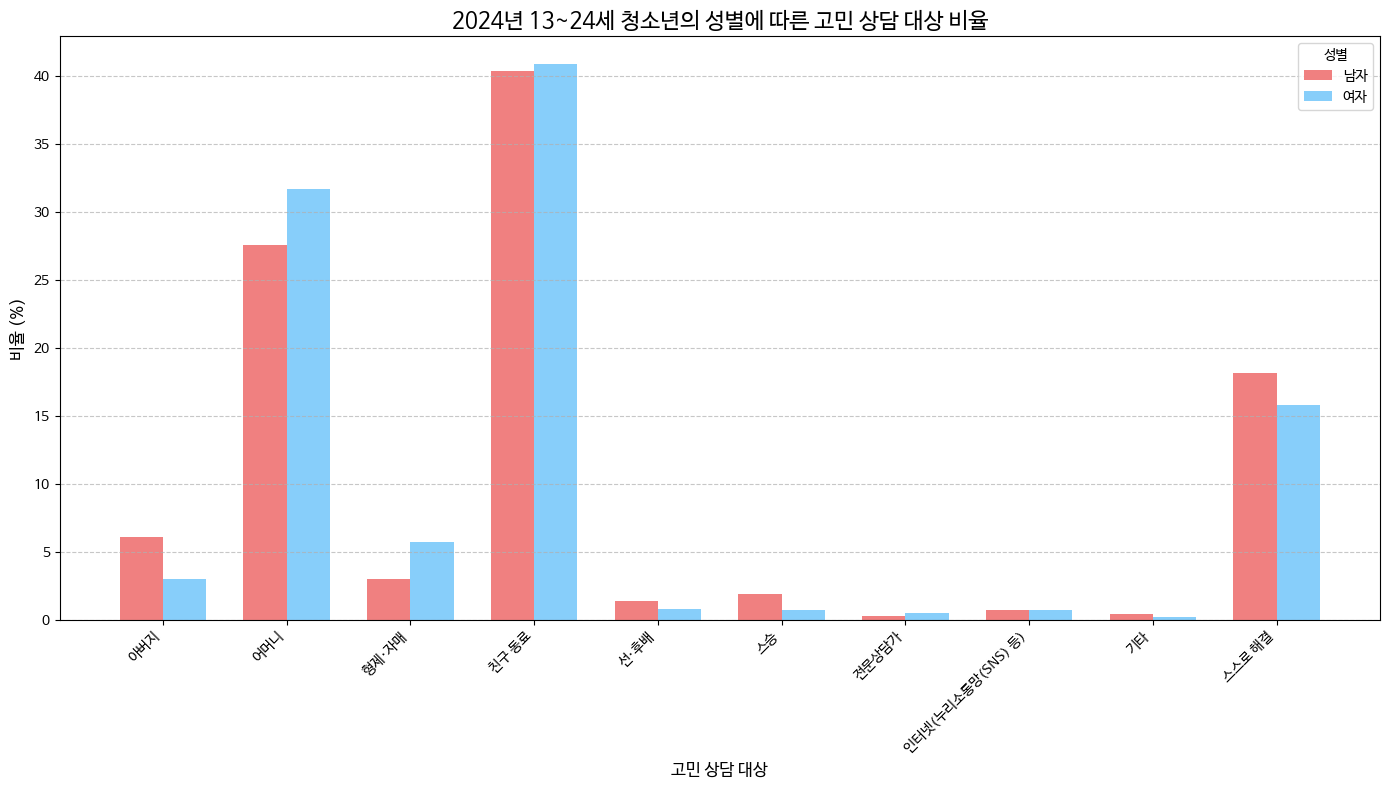


--- 차트 2 분석: 성별에 따른 고민 상담 대상 ---
남자 청소년이 가장 많이 상담하는 대상: **친구 동료 (40.4%)**
여자 청소년이 가장 많이 상담하는 대상: **친구 동료 (40.9%)**
성별과 관계없이 '친구 동료'가 가장 높은 상담 대상이지만, '어머니'와의 상담 비중은 여학생이 남학생보다 높게 나타납니다. '스스로 해결'하는 비중은 남학생이 여학생보다 높습니다.


In [9]:

# --- 차트 2: 성별에 따른 고민 상담 대상 비율 비교 (그룹 막대 그래프) ---
if not df_gender.empty:
    df_gender_melted = df_gender.melt(id_vars=['특성별(2)'], value_vars=consult_cols,
                                     var_name='상담 대상', value_name='비율(%)')

    plt.figure(figsize=(14, 8))
    bar_width = 0.35
    index = range(len(consult_cols))

    male_data = df_gender_melted[df_gender_melted['특성별(2)'] == '남자']['비율(%)']
    female_data = df_gender_melted[df_gender_melted['특성별(2)'] == '여자']['비율(%)']

    plt.bar(index, male_data, bar_width, label='남자', color='lightcoral')
    plt.bar([i + bar_width for i in index], female_data, bar_width, label='여자', color='lightskyblue')

    plt.xlabel('고민 상담 대상', fontsize=12)
    plt.ylabel('비율 (%)', fontsize=12)
    plt.title('2024년 13~24세 청소년의 성별에 따른 고민 상담 대상 비율', fontsize=16)
    plt.xticks([i + bar_width / 2 for i in index], consult_cols, rotation=45, ha='right')
    plt.legend(title='성별')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    male_max_consultant = df_gender[df_gender['특성별(2)'] == '남자'][consult_cols].iloc[0].idxmax()
    male_max_percentage = df_gender[df_gender['특성별(2)'] == '남자'][consult_cols].iloc[0].max()

    female_max_consultant = df_gender[df_gender['특성별(2)'] == '여자'][consult_cols].iloc[0].idxmax()
    female_max_percentage = df_gender[df_gender['특성별(2)'] == '여자'][consult_cols].iloc[0].max()

    print(f"\n--- 차트 2 분석: 성별에 따른 고민 상담 대상 ---")
    print(f"남자 청소년이 가장 많이 상담하는 대상: **{male_max_consultant} ({male_max_percentage:.1f}%)**")
    print(f"여자 청소년이 가장 많이 상담하는 대상: **{female_max_consultant} ({female_max_percentage:.1f}%)**")
    print("성별과 관계없이 '친구 동료'가 가장 높은 상담 대상이지만, '어머니'와의 상담 비중은 여학생이 남학생보다 높게 나타납니다. '스스로 해결'하는 비중은 남학생이 여학생보다 높습니다.")
else:
    print("\n--- 차트 2 (성별): 분석할 데이터가 없습니다. ---")


5. 차트 3: 학력별 고민 상담 대상 비율 비교 (그룹 막대 그래프)

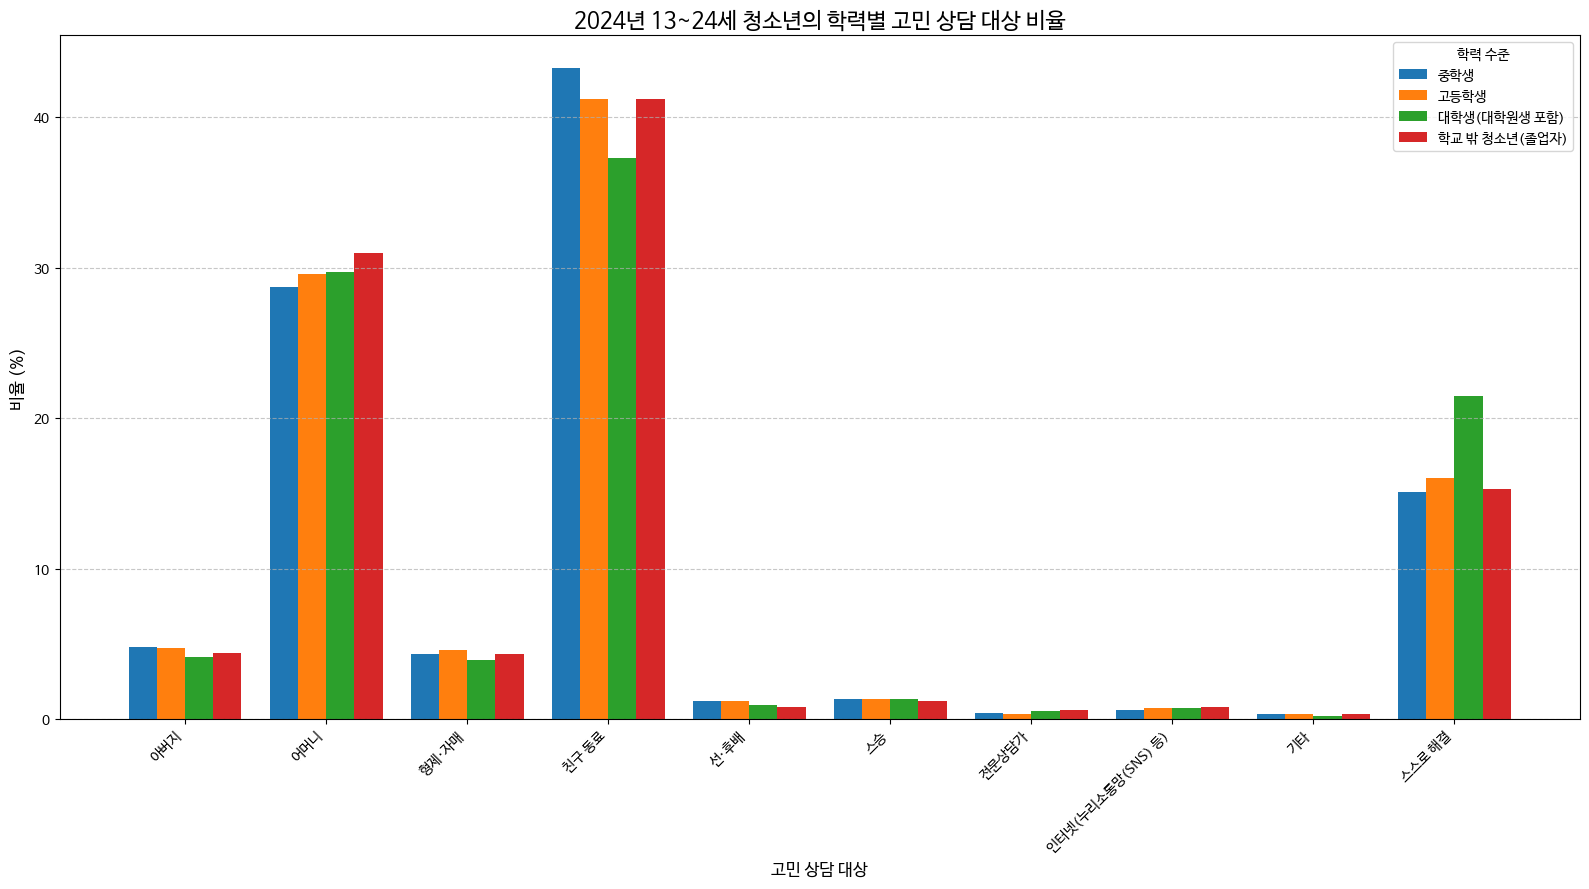


--- 차트 3 분석: 학력별 고민 상담 대상 ---
중학생 청소년이 가장 많이 상담하는 대상: **친구 동료 (43.3%)**
고등학생 청소년이 가장 많이 상담하는 대상: **친구 동료 (41.2%)**
대학생(대학원생 포함) 청소년이 가장 많이 상담하는 대상: **친구 동료 (37.3%)**
학교 밖 청소년(졸업자) 청소년이 가장 많이 상담하는 대상: **친구 동료 (41.2%)**

'친구 동료'는 모든 학력 수준에서 가장 주요한 상담 대상이지만, '대학생(대학원생 포함)'은 '스스로 해결'하는 비중이 다른 학력에 비해 크게 높습니다. 어머니와의 상담 비중은 학력별로 큰 차이가 없으며, 중학생은 친구 동료와의 상담 비중이 가장 높습니다.


In [10]:


# --- 차트 3: 학력별 고민 상담 대상 비율 비교 (그룹 막대 그래프) ---
if not df_edu.empty:
    edu_levels = df_edu['특성별(2)'].unique()
    num_levels = len(edu_levels)

    # num_levels가 0이 아닐 때만 계산 (ZeroDivisionError 방지)
    if num_levels > 0:
        bar_width_edu = 0.8 / num_levels
    else:
        bar_width_edu = 0.8 # 이 경우는 발생하지 않겠지만, 안전 장치

    plt.figure(figsize=(16, 9))

    for i, level in enumerate(edu_levels):
        data_level = df_edu[df_edu['특성별(2)'] == level][consult_cols].iloc[0]
        r = [x + i * bar_width_edu for x in range(len(consult_cols))]
        plt.bar(r, data_level, width=bar_width_edu, label=level)

    plt.xlabel('고민 상담 대상', fontsize=12)
    plt.ylabel('비율 (%)', fontsize=12)
    plt.title('2024년 13~24세 청소년의 학력별 고민 상담 대상 비율', fontsize=16)
    plt.xticks([x + (num_levels - 1) * bar_width_edu / 2 for x in range(len(consult_cols))], consult_cols, rotation=45, ha='right')
    plt.legend(title='학력 수준')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    print(f"\n--- 차트 3 분석: 학력별 고민 상담 대상 ---")
    for level in edu_levels:
        level_data = df_edu[df_edu['특성별(2)'] == level][consult_cols].iloc[0]
        max_consultant = level_data.idxmax()
        max_percentage = level_data.max()
        print(f"{level} 청소년이 가장 많이 상담하는 대상: **{max_consultant} ({max_percentage:.1f}%)**")

    print("\n'친구 동료'는 모든 학력 수준에서 가장 주요한 상담 대상이지만, '대학생(대학원생 포함)'은 '스스로 해결'하는 비중이 다른 학력에 비해 크게 높습니다. 어머니와의 상담 비중은 학력별로 큰 차이가 없으며, 중학생은 친구 동료와의 상담 비중이 가장 높습니다.")
else:
    print("\n--- 차트 3 (학력별): 분석할 데이터가 없습니다. ---")